<a href="https://colab.research.google.com/github/AzadMehedi/Plotly/blob/main/plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00


In [4]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00


# Objectives
- Session Objectives
- Introduction to Plotly
- Scatter Plots
- Line Charts
- Bar Plot
- Bubble Plot
- Box Plot
- Histograms
- Distplots
- Heatmaps

# 1. Introduction to Plotly
1. Until now we did visualisations using Matplotlib, Seaborn and Pandas. All of them produce static image files.

2. Plotly is company based out in Canada famous for it's products like Plotly and Dash

3. Plotly creates interactive visualisations in the form of HTML files

4. Drawback- can't work with a live data source

5. Dash is used to create live data based dashboards.

# **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
# import plotly.offline as pyo   # for jupyterNotebook(offline)
# import chart_studio.plotly as py
# import cufflinks as cf
# import seaborn as sns
# import plotly.express as px
# %matplotlib inline

# **Read Dataset**

In [20]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

ipl = delivery.merge(match, left_on='match_id', right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


# 1. **Scater plot**

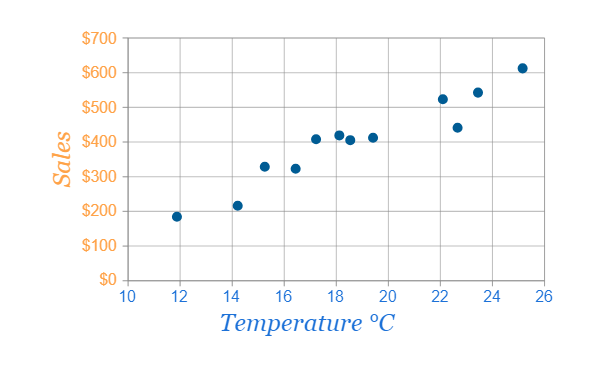

- Scatter plots are drawn between to continous variables
- Problem :- We are going to draw a scatter plot between Batsman Avg(X axis) and
- Batsman Strike Rate(Y axis) of the top 50 batsman in IPL(All time)

In [68]:
# Avg vs SR graph of Top 50 batsman(in terms of total runs)
# Fetching a new dataframe with Top 50 batsman

# ipl.groupby('batsman')['batsman_runs'].sum().nlargest(50)
top50 = ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl = ipl[ipl['batsman'].isin(top50)]

In [71]:
# Calculating Strik Rate
# SR=[(number of runs scored)/(number of balls played)]*100
runs = new_ipl.groupby('batsman')['batsman_runs'].sum()
balls = new_ipl.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100

sr=sr.reset_index()
sr

,batsman,batsman_runs
0,AB de Villiers,145.129059
1,AC Gilchrist,133.054662
2,AJ Finch,126.299213
3,AM Rahane,117.486549
4,AT Rayudu,123.014257
5,BB McCullum,126.318203
6,BJ Hodge,121.422376
7,CH Gayle,144.194313
8,DA Miller,137.709251
9,DA Warner,138.318401


In [80]:

# Calculating Avg
# Avg=(Total number of Runs)/(Number of outs)

# Calculating number of outs for top 50 batsman
out = ipl[ipl['player_dismissed'].isin(top50)]
num_tout = out['player_dismissed'].value_counts()
avg = runs/num_tout
avg = avg.reset_index()
avg.rename(columns={'index':'batsman', 0:'avg'}, inplace=True)
avg = avg.merge(sr, on='batsman')
avg

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213
3,AM Rahane,33.593407,117.486549
4,AT Rayudu,27.146067,123.014257
5,BB McCullum,28.112245,126.318203
6,BJ Hodge,33.333333,121.422376
7,CH Gayle,41.022472,144.194313
8,DA Miller,34.733333,137.709251
9,DA Warner,40.140000,138.318401
